In [275]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '230724_Radial_theta9_Data'
dataname = data+'03'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:29]
SensorData1 = SD1

In [276]:
SD1

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.88,57.66,0,0,1.6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.76,57.66,0,0,1.6
2,48,39,47,49,81,51,64,51,51,48,...,49,44,39,54,54,21.66,57.66,0,0,1.6
3,48,40,48,50,84,51,65,51,53,51,...,49,44,42,58,55,21.53,57.66,0,0,1.6
4,49,42,48,50,84,52,65,52,53,51,...,49,45,42,59,55,21.51,57.66,0,0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36671,48,45,47,49,87,53,66,49,57,53,...,51,48,42,64,50,126.28,208.65,0,39,8.0
36672,47,45,47,49,87,53,66,49,59,53,...,51,47,42,64,50,126.23,208.65,0,39,8.0
36673,47,45,48,49,87,53,66,50,57,53,...,51,47,42,63,50,126.21,208.65,0,39,8.0
36674,45,45,48,49,87,53,66,50,60,52,...,51,47,43,63,51,126.12,208.65,0,39,8.0


In [277]:
SDreal = SD1

In [278]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
count,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,...,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.000000,36676.0,36676.000000,36676.000000
mean,47.661604,44.040081,45.347721,50.313229,82.016932,49.509379,63.117297,47.358709,53.815492,51.870460,...,50.263769,45.900180,42.297552,60.572282,48.553823,51.119378,13.122277,0.0,19.475106,4.798909
std,7.073121,6.606916,6.703417,7.378547,11.798125,7.390249,9.356345,7.001176,8.023069,7.814962,...,7.357484,6.720976,6.347879,8.770381,7.201876,39.788412,95.278041,0.0,11.536285,2.065498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-483.760000,-150.210000,0.0,0.000000,1.600000
25%,48.000000,44.000000,45.000000,50.000000,83.000000,49.000000,63.000000,47.000000,54.000000,52.000000,...,50.000000,46.000000,42.000000,61.000000,48.000000,14.972500,-60.560000,0.0,9.000000,3.200000
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,51.000000,47.000000,43.000000,62.000000,50.000000,49.290000,-20.130000,0.0,19.000000,4.800000
75%,50.000000,46.000000,47.000000,53.000000,85.000000,52.000000,66.000000,49.000000,56.000000,54.000000,...,52.000000,48.000000,45.000000,63.000000,51.000000,84.120000,84.020000,0.0,29.000000,6.400000
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,57.000000,54.000000,50.000000,69.000000,57.000000,142.780000,217.970000,0.0,39.000000,8.000000


In [279]:
# SDreal 값이 0보다 작은데 encoder 인 것 제거
SDreal = SDreal[~((SDreal < 0)&(SDreal.columns != "encoder")).any(axis=1)]

# SDreal 값이 100보다 크거나 0인데, 'theta', 'z', 'Force' 열이 아닌 것 제거
SDreal = SDreal[~(((SDreal >= 100)|(SDreal == 0) ) & 
                 (SDreal.columns != "theta") &
                 (SDreal.columns != "z") &
                 (SDreal.columns != "Force") &
                  (SDreal.columns != "encoder")).any(axis=1)]

# SDreal 값이 8191이거나 8190인 것 제거
SDreal = SDreal[~((SDreal == 8191) | (SDreal == 8190)).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

SDreal = SDreal[~((SDreal >= 800) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal <= -300) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 0.8*3]
SDreal['theta'] *=9
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx19,Sx20,Sx21,Sx22,Sx23,Force,encoder,z,theta,r
count,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,...,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.0,27951.000000,27951.000000
mean,48.534256,44.945404,46.351580,51.338056,83.682802,50.435333,64.322421,48.306823,54.842510,52.853422,...,51.337555,46.905191,43.162320,61.849093,49.534865,64.890503,12.586787,0.0,175.267361,5.599428
std,2.304285,2.242305,2.001413,2.023341,2.241228,2.547024,3.018526,2.163072,2.762687,2.926912,...,1.997334,1.790941,2.177561,1.936944,2.263657,33.166025,95.531922,0.0,103.816334,1.599828
min,35.000000,33.000000,35.000000,39.000000,70.000000,37.000000,47.000000,36.000000,38.000000,36.000000,...,38.000000,36.000000,32.000000,50.000000,37.000000,3.370000,-150.210000,0.0,0.000000,3.200000
25%,48.000000,44.000000,45.000000,50.000000,83.000000,49.000000,63.000000,47.000000,54.000000,52.000000,...,50.000000,46.000000,42.000000,61.000000,48.000000,39.135000,-60.560000,0.0,81.000000,4.000000
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,52.000000,47.000000,43.000000,62.000000,50.000000,65.580000,-23.550000,0.0,171.000000,5.600000
75%,50.000000,46.000000,48.000000,53.000000,85.000000,52.000000,66.000000,50.000000,56.000000,55.000000,...,53.000000,48.000000,45.000000,63.000000,51.000000,91.915000,82.350000,0.0,261.000000,7.200000
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,57.000000,54.000000,50.000000,69.000000,57.000000,140.700000,214.890000,0.0,351.000000,8.000000


In [280]:
def normalize_dataframe(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / (df[column].max() - df[column].min()) * 2
    return df


#SDreal_normalized = normalize_dataframe(SDreal)
SDreal_normalized = normalize_dataframe(SDreal, ['r', 'Force'])
SDreal = SDreal_normalized

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad*2)
#SD['cos'] = (SD['cos']-SD['cos'].mean())/(SD['cos'].max()-SD['cos'].min())*2
SDreal['sin']=np.sin(SDreal['theta']*toRad*2)

SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx21,Sx22,Sx23,Force,encoder,z,theta,r,cos,sin
count,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,27951.000000,...,27951.000000,27951.000000,27951.000000,2.795100e+04,27951.000000,27951.0,27951.000000,2.795100e+04,2.795100e+04,2.795100e+04
mean,48.534256,44.945404,46.351580,51.338056,83.682802,50.435333,64.322421,48.306823,54.842510,52.853422,...,43.162320,61.849093,49.534865,1.461041e-15,12.586787,0.0,175.267361,-1.664015e-14,-3.509135e-04,1.191341e-03
std,2.304285,2.242305,2.001413,2.023341,2.241228,2.547024,3.018526,2.163072,2.762687,2.926912,...,2.177561,1.936944,2.263657,4.830121e-01,95.531922,0.0,103.816334,6.665951e-01,7.073641e-01,7.068736e-01
min,35.000000,33.000000,35.000000,39.000000,70.000000,37.000000,47.000000,36.000000,38.000000,36.000000,...,32.000000,50.000000,37.000000,-8.959514e-01,-150.210000,0.0,0.000000,-9.997615e-01,-1.000000e+00,-1.000000e+00
25%,48.000000,44.000000,45.000000,50.000000,83.000000,49.000000,63.000000,47.000000,54.000000,52.000000,...,42.000000,61.000000,48.000000,-3.750892e-01,-60.560000,0.0,81.000000,-6.664282e-01,-8.090170e-01,-5.877853e-01
50%,49.000000,45.000000,46.000000,51.000000,84.000000,51.000000,65.000000,48.000000,55.000000,53.000000,...,43.000000,62.000000,50.000000,1.004146e-02,-23.550000,0.0,171.000000,2.385126e-04,-1.836970e-16,1.224647e-16
75%,50.000000,46.000000,48.000000,53.000000,85.000000,52.000000,66.000000,50.000000,56.000000,55.000000,...,45.000000,63.000000,51.000000,3.935702e-01,82.350000,0.0,261.000000,6.669052e-01,8.090170e-01,8.090170e-01
max,55.000000,53.000000,55.000000,59.000000,90.000000,58.000000,73.000000,56.000000,62.000000,60.000000,...,50.000000,69.000000,57.000000,1.104049e+00,214.890000,0.0,351.000000,1.000239e+00,1.000000e+00,1.000000e+00


In [281]:
SDy = SDreal.iloc[:,[24,29,30]]
SDy.describe()

,Force,cos,sin
count,2.795100e+04,2.795100e+04,2.795100e+04
mean,1.461041e-15,-3.509135e-04,1.191341e-03
std,4.830121e-01,7.073641e-01,7.068736e-01
min,-8.959514e-01,-1.000000e+00,-1.000000e+00
25%,-3.750892e-01,-8.090170e-01,-5.877853e-01
50%,1.004146e-02,-1.836970e-16,1.224647e-16
75%,3.935702e-01,8.090170e-01,8.090170e-01
max,1.104049e+00,1.000000e+00,1.000000e+00


In [282]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# SDreal.hist(bins=50, figsize=(20,15))
# plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/'+dataname+'_hist230320.png')
# plt.show()

In [283]:
#X = SDreal.iloc[:,:24]
selected_cols = [col for idx, col in enumerate(SDreal.columns) if idx % 3 == 0 ]
X = SDreal[selected_cols]
y = SDreal.iloc[:,[24,29,30]]

In [284]:
X

,Sx00,Sx03,Sx06,Sx09,Sx12,Sx15,Sx18,Sx21,Force,theta,sin
208,50,52,64,49,56,35,41,40,-0.142292,0,0.000000
209,51,53,64,52,58,35,41,40,-0.144186,0,0.000000
210,52,53,65,52,58,36,41,40,-0.146807,0,0.000000
211,52,53,64,49,57,36,41,40,-0.150739,0,0.000000
212,52,53,64,52,57,38,39,41,-0.152050,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
36671,48,49,66,53,42,42,42,42,0.894044,351,-0.309017
36672,47,49,66,53,42,42,42,42,0.893315,351,-0.309017
36673,47,49,66,53,41,41,42,42,0.893024,351,-0.309017
36674,45,49,66,52,41,41,42,43,0.891713,351,-0.309017


In [285]:
y.sample(5)

,Force,cos,sin
19944,0.046887,0.951057,0.309017
22615,-0.211323,0.309017,0.951057
6300,0.718554,-0.309017,0.951057
15019,-0.530263,0.309017,-0.951057
26016,-0.676771,-0.809017,0.587785


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [287]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  22136 ea 79 %    X_valid:  5535 ea 19 %    X_test:  280 ea 1 %


In [288]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [289]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/230724_Radial_theta9_Data03_SS.pkl']

In [290]:
from tensorflow import keras
model = keras.models.Sequential([   
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),        
    keras.layers.Dense(3)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-5, rho=0.9))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 128)               1536      
                                                                 
 dense_95 (Dense)            (None, 64)                8256      
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dense_97 (Dense)            (None, 16)                528       
                                                                 
 dense_98 (Dense)            (None, 8)                 136       
                                                                 
 dense_99 (Dense)            (None, 3)                 27        
                                                                 
Total params: 12,563
Trainable params: 12,563
Non-tra

## Callback (best, early stopping, tensorboard)

In [291]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'230320_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [292]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [293]:
dataname

'230724_Radial_theta9_Data03'

In [294]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 4
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
692/692 [==============================] - 2s 2ms/step - loss: 0.0764 - val_loss: 0.0257
Epoch 2/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0104
Epoch 3/300
692/692 [==============================] - 1s 2ms/step - loss: 0.0099 - val_loss: 0.0078
Epoch 4/300
692/692 [==============================] - 1s 2ms/step - loss: 0.0071 - val_loss: 0.0057
Epoch 5/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 6/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 7/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 8/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 9/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 10/300
692/692 [==============================] - 1s 1ms/step - loss: 0.0032 - val_lo

In [295]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [296]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v1/myModel/'+dataname+'.h5')

In [297]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_cos","valid_sin"]

valid_predictions_df

173/173 [==============================] - 0s 715us/step


,valid_force,valid_cos,valid_sin
0,0.195384,-0.803069,0.614953
1,-0.147843,0.967186,-0.015082
2,0.766821,0.929267,-0.263628
3,-0.168326,-0.384944,-0.912252
4,0.937282,0.994984,0.019706
...,...,...,...
5530,0.468203,0.616385,0.774395
5531,0.140687,0.938947,-0.276563
5532,-0.420482,-0.958776,0.263450
5533,-0.680388,-0.578894,0.798907


In [298]:

k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns  = ["force","z","r"]
#k_df.columns  = ["force","z"]
k_df.columns  = ["force","cos","sin"]
k_df.describe()

,force,cos,sin
count,5535.000000,5.535000e+03,5535.000000
mean,-0.000689,-1.914803e-04,-0.002245
std,0.479705,7.052583e-01,0.709074
min,-0.895951,-1.000000e+00,-1.000000
25%,-0.367735,-5.877853e-01,-0.809017
50%,0.010478,-1.836970e-16,0.000000
75%,0.393716,5.877853e-01,0.809017
max,1.072883,1.000000e+00,1.000000


In [299]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
99.89% force
99.90% cos
99.94% sin


,force,cos,sin,valid_force,valid_cos,valid_sin
force,1.000000,0.167358,0.035347,0.998864,0.165047,0.032111
cos,0.167358,1.000000,-0.005603,0.166358,0.998999,0.002550
sin,0.035347,-0.005603,1.000000,0.017199,-0.006231,0.999378
valid_force,0.998864,0.166358,0.017199,1.000000,0.164038,0.013966
valid_cos,0.165047,0.998999,-0.006231,0.164038,1.000000,0.002094
valid_sin,0.032111,0.002550,0.999378,0.013966,0.002094,1.000000


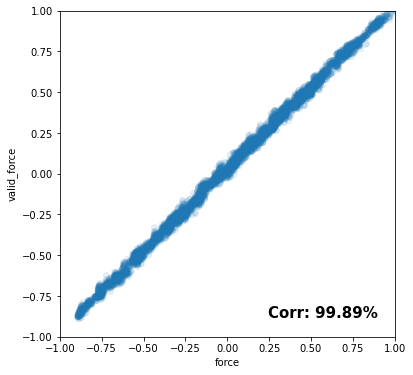

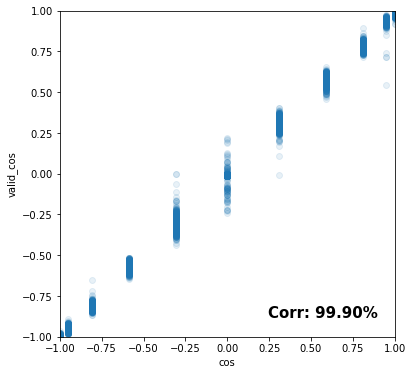

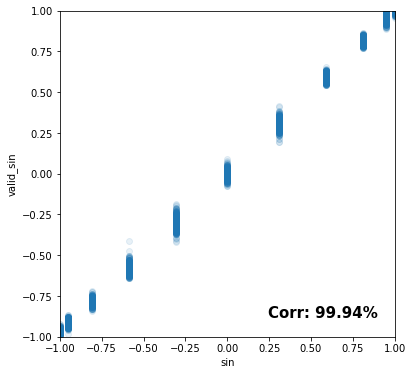

In [300]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#fields = ['z', 'force']
fields = ['force', 'cos','sin']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


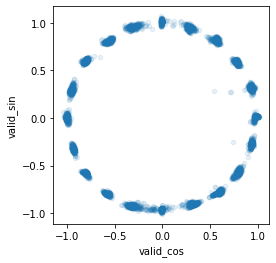

In [301]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')

# Display the plot
plt.show()


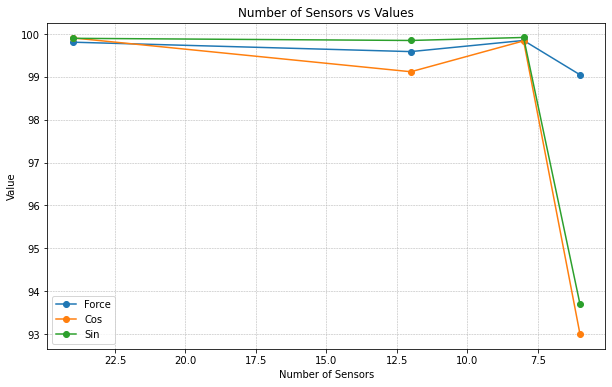

In [302]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the given data
data = {
    'Sensors': [24, 12, 8, 6],
    'Force': [99.81, 99.59, 99.85, 99.05],
    'Cos': [99.91, 99.12, 99.84, 93],
    'Sin': [99.9, 99.85, 99.92, 93.7]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10,6))

for column in ["Force", "Cos", "Sin"]:
    plt.plot(df['Sensors'], df[column], marker='o', label=column)

plt.title("Number of Sensors vs Values")
plt.xlabel("Number of Sensors")
plt.ylabel("Value")
plt.legend()
plt.gca().invert_xaxis()  # To display 24 on the left and 6 on the right, similar to the provided data order
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


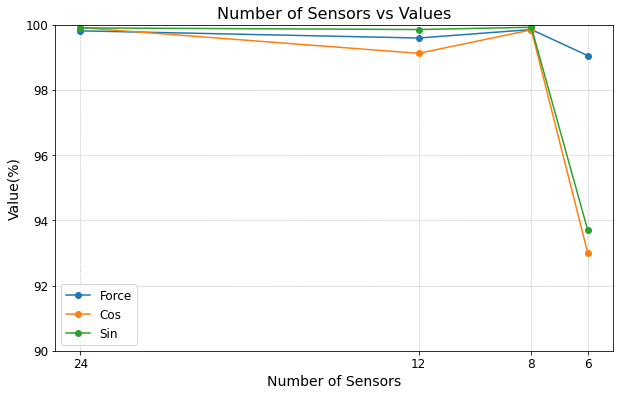

In [310]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the given data
data = {
    'Sensors': [24, 12, 8, 6],
    'Force': [99.81, 99.59, 99.85, 99.05],
    'Cos': [99.91, 99.12, 99.84, 93],
    'Sin': [99.9, 99.85, 99.92, 93.7]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10,6))

for column in ["Force", "Cos", "Sin"]:
    plt.plot(df['Sensors'], df[column], marker='o', label=column)

plt.title("Number of Sensors vs Values", fontsize=16)
plt.xlabel("Number of Sensors", fontsize=14)
plt.ylabel("Value(%)", fontsize=14)
plt.ylim(90, 100)
plt.xticks(df['Sensors'])  # This line sets the x-axis ticks to only show the specified values
plt.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size here
plt.legend(fontsize=12)
plt.gca().invert_xaxis()  # To display 24 on the left and 6 on the right, similar to the provided data order
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
